**Group Members**

1.ณพฤกษ์ พิมพ์สาร 6220422059

2.อมร ตยาคี 6220422058

3.วีรพัชร จินตนไชยวัฒน์ 6220422071

4.มินตรา โศจิพันธุ์ 6220422057

In [1]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.2 MB/s 
     |████████████████████████████████| 261 kB 41.6 MB/s 
     |████████████████████████████████| 86 kB 5.5 MB/s 
     |████████████████████████████████| 113 kB 47.5 MB/s 
     |████████████████████████████████| 1.3 MB 18.5 MB/s 
     |████████████████████████████████| 6.8 MB 20.3 MB/s 
     |████████████████████████████████| 15.5 MB 28.4 MB/s 
     |████████████████████████████████| 167 kB 56.2 MB/s 
     |████████████████████████████████| 2.0 MB 33.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 3.0 MB/s 
     |████████████████████████████████| 10.1 MB 41.2 MB/s 
     |████████████████████████████████| 62 kB 777 kB/s 
     |████████████████████████████████| 303 kB 55.9 MB/s 
     |██████████████████

In [2]:
import pandas as pd
from pycaret.clustering import *

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/CRM - Customer Segmentation/Copy of Supermarket Data.csv')

In [5]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [6]:
df.tail(5)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
956569,200617,2006-06-22,5,12,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,9.941011e+14,M,MM,Top Up,Fresh,STORE00002,LS,W01
956570,200633,2006-10-13,6,20,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,9.941027e+14,L,LA,Top Up,Fresh,STORE00002,LS,W01
956571,200617,2006-06-22,5,18,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000544241,LA,YA,9.941011e+14,L,LA,Top Up,Fresh,STORE00002,LS,W01
956572,200619,2006-07-06,5,19,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,CUST0000423155,LA,YF,9.941013e+14,L,LA,Full Shop,Fresh,STORE00002,LS,W01
956573,200635,2006-10-23,2,21,3,3.96,PRD0904997,CL00074,DEP00021,G00007,D00002,NaN,NaN,NaN,9.941029e+14,L,MM,Top Up,Fresh,STORE00002,LS,W01


# **Prepare customer single view**

In [7]:
##prepare customer single view
df_csv = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  TotalQuantity=('QUANTITY', 'sum'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max')
                                                                                  ).reset_index()

In [8]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [9]:
df_csv['TicketVolumn'] = df_csv['TotalQuantity']/df_csv['TotalVisits']

In [10]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [11]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [12]:
df_csv.head(20)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,FirstDate,LastDate,TicketSize,TicketVolumn,total_days,recency
0,CUST0000000181,2.44,1,1,1,2007-01-06,2007-01-06,2.440000,1.000000,1,547
1,CUST0000000369,959.33,220,189,923,2006-04-16,2008-07-05,4.360591,4.195455,812,1
2,CUST0000000689,328.57,16,116,334,2007-07-22,2008-06-23,20.535625,20.875000,338,13
3,CUST0000000998,5.95,3,4,6,2006-05-04,2006-07-07,1.983333,2.000000,65,730
4,CUST0000001163,39.74,4,24,34,2006-10-22,2008-06-22,9.935000,8.500000,610,14
5,CUST0000001194,2493.83,103,403,1705,2006-04-22,2008-06-20,24.211942,16.553398,791,16
6,CUST0000002257,1.99,1,1,1,2006-07-21,2006-07-21,1.990000,1.000000,1,716
7,CUST0000002499,0.34,1,1,1,2006-04-14,2006-04-14,0.340000,1.000000,1,814
8,CUST0000002605,1.80,6,1,6,2006-10-08,2008-06-12,0.300000,1.000000,614,24
9,CUST0000002637,124.63,15,53,126,2006-08-03,2008-05-30,8.308667,8.400000,667,37


# **Cluster customers**

In [13]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,5721
1,Original Data,"(6100, 11)"
2,Missing Values,False
3,Numeric Features,8
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 8)"
9,CPU Jobs,-1


In [14]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [15]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7f7e29cb3170>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7f7e29c...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7f7e29cb34d0>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7f7e29f2b200>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7f7e29f26f80>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7f7e29f2b290>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [16]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1801,128.5355,9.0214,0,0,0


In [17]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.915900,186.239700,0.058500,0,0,0
birch,0.449700,1793.673300,0.859200,0,0,0
kmeans,0.409700,3504.455200,0.900400,0,0,0
hclust,0.364900,2832.447700,0.974800,0,0,0
dbscan,0.142900,193.608200,1.807800,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
kmodes,-0.180100,128.535500,9.021400,0,0,0


# Spectral Clustering Clustering

In [18]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9159,186.2397,0.0585,0,0,0


In [19]:
plot_model(sc)

# KMeans Clustering

In [20]:
kmeans = create_model('kmeans', num_clusters = 5)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4107,3416.4862,0.9069,0,0,0


In [21]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=5721, tol=0.0001, verbose=0)


In [22]:
plot_model(kmeans)

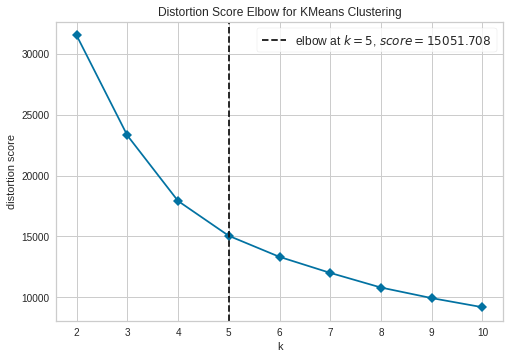

In [23]:
plot_model(kmeans, plot = 'elbow')

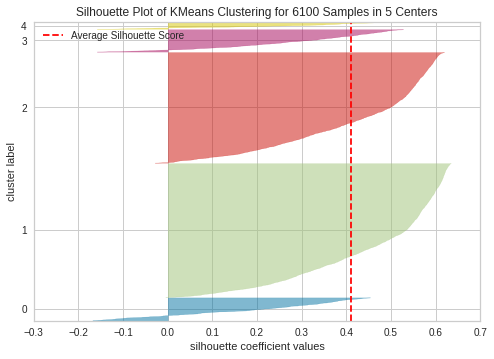

In [24]:
plot_model(kmeans, plot = 'silhouette')

In [29]:
df_csv = df_csv.drop(columns=['CUST_CODE','FirstDate', 'LastDate'])

df_csv['cluster'] = kmeans.labels_
df_csv

,TotalSpend,TotalVisits,TotalSKUs,TotalQuantity,TicketSize,TicketVolumn,total_days,recency,cluster
0,2.44,1,1,1,2.440000,1.000000,1,547,1
1,959.33,220,189,923,4.360591,4.195455,812,1,3
2,328.57,16,116,334,20.535625,20.875000,338,13,0
3,5.95,3,4,6,1.983333,2.000000,65,730,1
4,39.74,4,24,34,9.935000,8.500000,610,14,2
...,...,...,...,...,...,...,...,...,...
6095,453.58,30,206,395,15.119333,13.166667,698,95,2
6096,105.11,11,46,91,9.555455,8.272727,740,59,2
6097,5.86,1,4,6,5.860000,6.000000,1,742,1
6098,444.17,21,127,343,21.150952,16.333333,555,31,2


Text(0.5, 1.0, 'Total Spend')

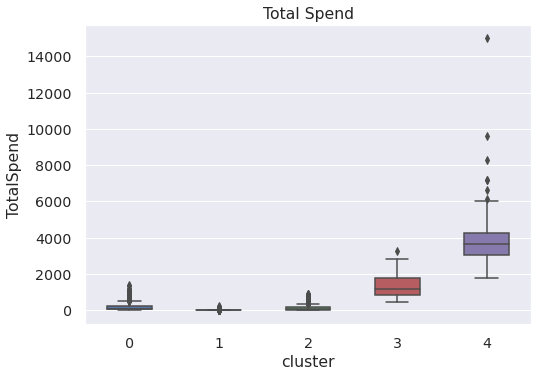

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TotalSpend", data=df_csv, width=0.5)
plt.title("Total Spend")

Text(0.5, 1.0, 'Total Visits')

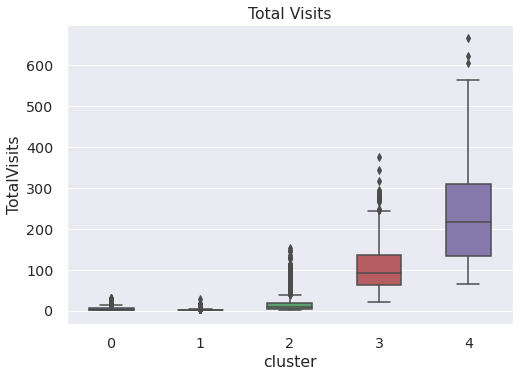

In [41]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TotalVisits", data=df_csv, width=0.5)
plt.title("Total Visits")

Text(0.5, 1.0, 'Total SKUs')

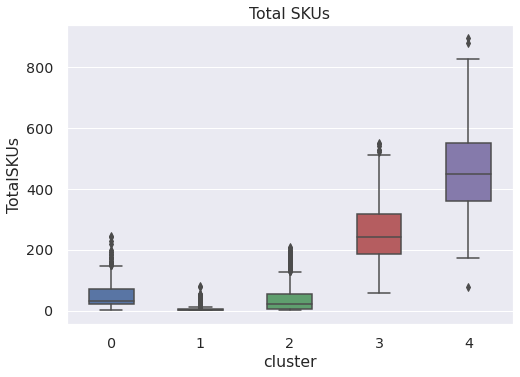

In [45]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TotalSKUs", data=df_csv, width=0.5)
plt.title("Total SKUs")

Text(0.5, 1.0, 'Total Quantity')

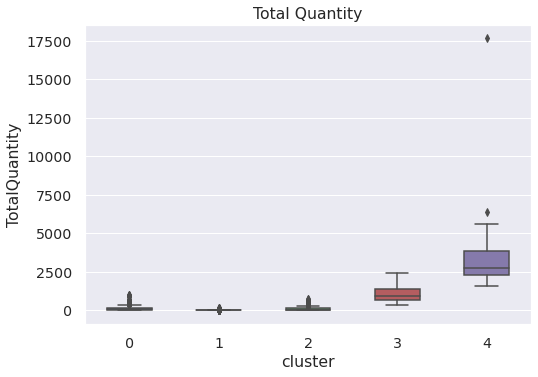

In [46]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TotalQuantity", data=df_csv, width=0.5)
plt.title("Total Quantity")

Text(0.5, 1.0, 'Ticket Size')

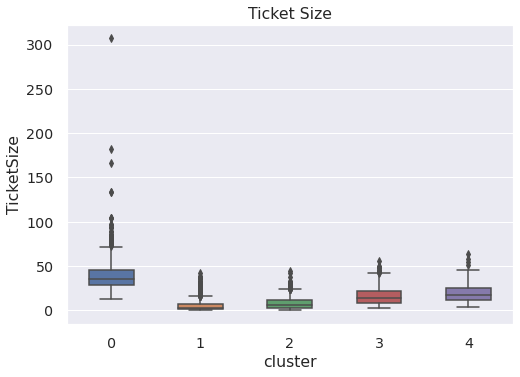

In [47]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TicketSize", data=df_csv, width=0.5)
plt.title("Ticket Size")

Text(0.5, 1.0, 'Ticket Volumn')

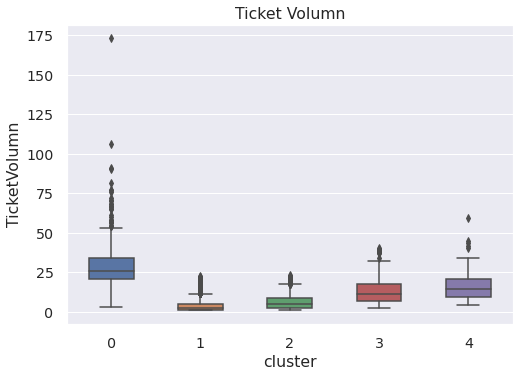

In [48]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="TicketVolumn", data=df_csv, width=0.5)
plt.title("Ticket Volumn")

Text(0.5, 1.0, 'total_days')

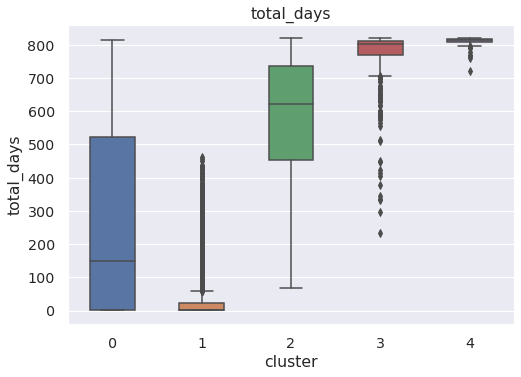

In [49]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="total_days", data=df_csv, width=0.5)
plt.title("total_days")

Text(0.5, 1.0, 'Recency')

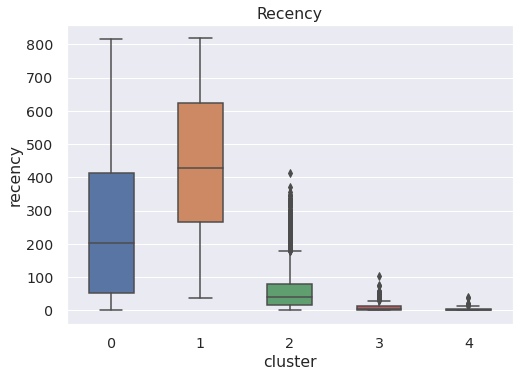

In [50]:
sns.set(font_scale = 1.3)
sns.boxplot(x="cluster", y="recency", data=df_csv, width=0.5)
plt.title("Recency")

# Interpret

Cluster 0 

ชื่อกลุ่ม > เพื่อนสนิทที่อยู่ต่างประเทศ นานๆเจอกันทีแต่เจอทีก็คุยยาว

เนื่องจาก ticket size และ ticket volumn สูงกว่ากลุ่มอื่น หมายความว่าเป็นลูกค้าที่ชอบซื้อสินค้าราคาไม่แพง และซื้อครั้งละเยอะๆ ขณะที่จำนวนครั้งที่มาซื้อก็ไม่บ่อยแสดงให้เห็นว่าอาจะเป็นลูกค้าที่ชอบตุนของ หรือซื้อเฉพาะของใช้จำเป็นซึ่งจะซื้อเป็นรอบๆ

Action

1. ทำโปรโมชั่นให้เพื่อเพิ่มจำนวนครั้งที่จะมาซื้อของที่ร้าน เช่น หากใช้จ่ายครบ 500 บาท เป็นจำนวน 8 ครั้งภายใน 1 เดือน คุณจะได้ส่วนลด 50% ในการซื้อของรอบหน้า

Cluster 1

ชื่อกลุ่ม > เพื่อนที่ไม่คบกับเราแล้ว เจอกันทีก็ตามงานสังคมในกลุ่มเพื่อน เช่นงานแต่ง

เนื่องจากครั้งล่าสุดที่ลูกค้ามาก็นานมาก แถมยังซื้อของน้อย ยอดก็ไม่เยอะเมื่อเทียบกับกลุ่มอื่น ดังนั้นจึงบอกได้ว่ากลุ่มนี้เป็นลูกค้าขาจรที่บังเอิญแวะผ่านร้านมาซื้อของติดมือนิดหน่อย

Action

1. ไม่ทำอะไร เพราะเปลือง cost เราไปลงทุนกับลูกค้ากลุ่มอื่นดีกว่า

Cluster 2

ชื่อกลุ่ม > เพื่อนที่คบกันเพราะผลประโยชน์ เช่น เป็น business partner

เป็นลูกค้าที่มีความสัมพันธ์กับร้านเราระดับกลางๆ เนื่องจาก recency ค่อนข้างต่ำ แต่มี outlier ที่ไปทางค่าสูงอยู่มาก และลูกค้ากลุ่มนี้มีค่าจำนวนครั้งที่มาซื้อ และยอดการซื้อไม่ได้แตกต่างจากกลุ่มอื่นมากนักแต่อยู่ในระดับกลางๆจากทั้ง 5 กลุ่ม

Action

1. ส่งโปรโมชั่นส่วนลดไปให้เพื่อให้กลับมาซื้อของที่ร้านบ่อยขึ้น รวมถึงทำ cross selling และ upselling กับสินค้าต่างๆ ให้กับลูกค้ากลุ่มนี้ เพื่อให้ลูกค้ากลุ่มนี้ loyal กับเรามากขึ้น เพราะเป็นกลุ่มที่มี potential ที่จะเป็นลูกค้าประจำเราสูง

Cluster 3 

ชื่อกลุ่ม > เพื่อนสนิทที่เพิ่งรู้จักกันได้ไม่นาน และยังคุยกันอยู่เรื่อยๆ

เป็นลูกค้าประจำที่มาบ่อยๆและใช้ซื้อของเยอะ ใช้จ่ายค่อนข้างสูง

Action

1. ทำ Upselling เพื่อให้ลูกค้ากลุ่มนี้ใช้จ่ายสูงขึ้น

Cluster 4

ชื่อกลุ่ม > เพื่อนตายที่คบกันมานานมาก เป็นเพื่อนแท้ที่หายาก

เป็นลูกค้าแฟนพันธ์แท้ของร้าน เพราะมาบ่อยมาก และซื้อของเยอะ ซื้อทียอดก็เยอะ เป็นลูกค้าที่ร้านมานานมากๆ

Action

1. จัดกิจกรรมทาง online และ offine ให้เฉพาะลูกค้ากลุ่มนี้เพื่อ maintain relationship ปัจจุบันไว้